In [2]:
import re
from collections import deque
import numpy as np

In [3]:
with open('input.txt', 'r') as f:
    task_input = f.read()

In [4]:
lst_input = task_input.split('\n')

initial_state = lst_input[0].replace('initial state: ', '')
transformations = lst_input[2:]

In [5]:
dic_transform = {}
for i in transformations:
    key, value = i.split(' => ')
    dic_transform[key] = value
    
dic_transform

{'#####': '.',
 '####.': '#',
 '###.#': '#',
 '###..': '.',
 '##.##': '.',
 '##.#.': '.',
 '##..#': '#',
 '##...': '#',
 '#.###': '.',
 '#.##.': '#',
 '#.#.#': '#',
 '#.#..': '.',
 '#..##': '#',
 '#..#.': '.',
 '#...#': '#',
 '#....': '.',
 '.####': '#',
 '.###.': '#',
 '.##.#': '#',
 '.##..': '.',
 '.#.##': '#',
 '.#.#.': '.',
 '.#..#': '#',
 '.#...': '#',
 '..###': '.',
 '..##.': '#',
 '..#.#': '.',
 '..#..': '.',
 '...##': '#',
 '...#.': '.',
 '....#': '.',
 '.....': '.'}

In [6]:
def sum_pot_numbers(d, buffer_size):
    return sum([n-buffer_size if i == '#' else 0 for n, i in enumerate(d)])

In [7]:
%%time

sequence_size = 5
generation_total = 20
buffer_size = generation_total * 2
lst_sums = []

# setting up a buffer
d = deque('.'*buffer_size+initial_state+'.'*buffer_size)
lst_sums.append(sum_pot_numbers(d, buffer_size))

total_count_plants = d.count('#')

for generation in range(1, generation_total+1):
    
    next_gen_d = deque([])
        
    # looping through the five character sequences in the deque
    for _ in range(len(d) + 1 - sequence_size):
        
        # sequence is the first five characters of the deque (this will rotate)
        sequence = ''.join(list(d)[:sequence_size])
        replacement = '.'

        for key in dic_transform:
            if key == sequence:
                replacement = dic_transform[key]
                break
        next_gen_d.append(replacement)
                
        d.rotate(-1)
                
    d = next_gen_d
    d.appendleft('.')
    d.appendleft('.')
    d.append('.')
    d.append('.')
    #print generation, ''.join(list(d))
    total_count_plants += d.count('#')
    lst_sums.append(sum_pot_numbers(d, buffer_size))
    
print total_count_plants, sum_pot_numbers(d, buffer_size)

1275 3405
CPU times: user 32.6 ms, sys: 14 ms, total: 46.6 ms
Wall time: 34.7 ms


In [23]:
import matplotlib.pyplot as plt

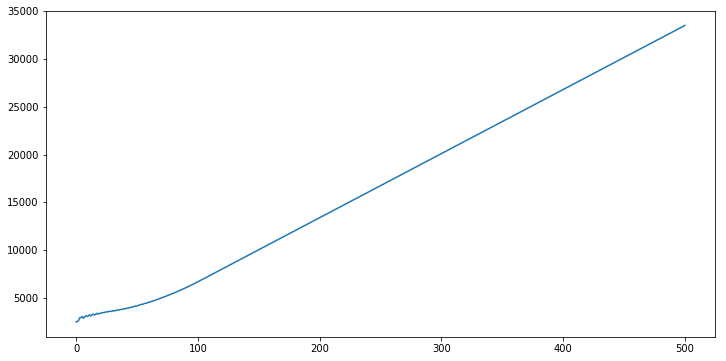

In [24]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(generation_total+1), lst_sums)
plt.show()

In [29]:
np.diff(lst_sums[:150])

array([  51,   84,  322,   -5,  111, -182,  161,  108,  -85,   59,  136,
       -131,  104,   89,  -88,   84,   82,  -84,   82,    9,   55,   16,
          2,   61,    9,    3,   59,   -5,    0,   66,  -11,    7,   67,
         -7,    7,   71,   -7,   11,   71,   -3,   11,   75,   -3,   15,
         75,    1,   15,   79,    1,   19,   79,    5,   65,   36,    5,
         69,   36,    9,   69,   40,    9,   73,   40,   13,   73,   44,
         13,   77,   44,   47,   46,   48,   47,   50,   48,   51,   50,
         52,   51,   54,   52,   55,   54,   56,   55,   58,   56,   59,
         58,   60,   59,   62,   60,   63,   62,   64,   63,   66,   66,
         65,   66,   67,   67,   67,   67,   67,   67,   67,   67,   67,
         67,   67,   67,   67,   67,   67,   67,   67,   67,   67,   67,
         67,   67,   67,   67,   67,   67,   67,   67,   67,   67,   67,
         67,   67,   67,   67,   67,   67,   67,   67,   67,   67,   67,
         67,   67,   67,   67,   67,   67])

In [30]:
common_difference = 67

In [33]:
gen_500_sum = lst_sums[-1]

In [35]:
remaining = 50000000000 - 500

In [37]:
gen_500_sum + (common_difference * remaining)

3350000000000